**Modern methods of Data Analysis**

**Seminar 3**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt # graphs
import seaborn as sns # graphs
from sklearn.model_selection import train_test_split

In [3]:
!wget https://raw.githubusercontent.com/katerinaoleynikova/Master-in-Bioinformatics-at-HSE/main/Data_Cortex_Nuclear_moda_seminar2-3.csv

--2021-11-09 07:02:36--  https://raw.githubusercontent.com/katerinaoleynikova/Master-in-Bioinformatics-at-HSE/main/Data_Cortex_Nuclear_moda_seminar2-3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1010610 (987K) [text/plain]
Saving to: ‘Data_Cortex_Nuclear_moda_seminar2-3.csv’

Data_Cortex_Nuclear 100%[===================>] 986.92K  --.-KB/s    in 0.06s   

2021-11-09 07:02:37 (16.3 MB/s) - ‘Data_Cortex_Nuclear_moda_seminar2-3.csv’ saved [1010610/1010610]



In [4]:
# read data
mouse = pd.read_csv('Data_Cortex_Nuclear_moda_seminar2-3.csv')
mouse.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [5]:
mouse.shape

(1080, 82)

In [6]:
# need to delete (better drop) the following columns: "MouseID", "Genotype", "Treatment", "Behavior"
# axis = 1 means columns
data = mouse.drop(labels = ["MouseID", "Genotype", "Treatment", "Behavior"], axis = 1)
# lets keep the two decimal points for better representation
pd.set_option("precision", 2)

In [7]:
data.head(100)

DYRK1A_N  ITSN1_N  BDNF_N  NR1_N  ...  EGR1_N  H3MeK4_N  CaNA_N   class
0       0.50     0.75    0.43   2.82  ...    0.13      0.13    1.68  c-CS-m
1       0.51     0.69    0.41   2.79  ...    0.14      0.13    1.74  c-CS-m
2       0.51     0.73    0.42   2.69  ...    0.13      0.13    1.93  c-CS-m
3       0.44     0.62    0.36   2.47  ...    0.15      0.15    1.70  c-CS-m
4       0.43     0.62    0.36   2.37  ...    0.14      0.15    1.84  c-CS-m
..       ...      ...     ...    ...  ...     ...       ...     ...     ...
95      0.36     0.55    0.31   2.43  ...    0.14      0.15    1.59  c-CS-m
96      0.29     0.45    0.27   2.01  ...    0.14      0.16    1.59  c-CS-m
97      0.29     0.46    0.26   2.00  ...    0.14      0.16    1.54  c-CS-m
98      0.30     0.48    0.27   2.10  ...    0.15      0.15    1.54  c-CS-m
99      0.25     0.39    0.26   1.96  ...    0.16      0.16    1.39  c-CS-m

[100 rows x 78 columns]

In [8]:
data["BAD_N"].isnull() # if BAD_N column contains 0

0       False
1       False
2       False
3       False
4       False
        ...  
1075    False
1076    False
1077    False
1078    False
1079    False
Name: BAD_N, Length: 1080, dtype: bool

In [9]:
# show data in which BAD_N column contains NaN
data[data['BAD_N'].isnull()]

DYRK1A_N  ITSN1_N  BDNF_N  NR1_N  ...  EGR1_N  H3MeK4_N  CaNA_N   class
45       0.56     0.76    0.40   2.93  ...    0.17       NaN    1.68  c-CS-m
46       0.52     0.75    0.40   2.92  ...    0.19       NaN    1.72  c-CS-m
47       0.51     0.77    0.42   2.93  ...    0.18       NaN    1.65  c-CS-m
48       0.51     0.70    0.38   2.92  ...    0.19       NaN    1.70  c-CS-m
49       0.48     0.69    0.38   2.91  ...    0.19       NaN    1.71  c-CS-m
..        ...      ...     ...    ...  ...     ...       ...     ...     ...
820      0.38     0.60    0.33   2.27  ...     NaN      0.26    1.09  t-SC-m
821      0.38     0.60    0.34   2.29  ...     NaN      0.27    1.08  t-SC-m
822      0.36     0.58    0.33   2.09  ...     NaN      0.29    1.01  t-SC-m
823      0.34     0.54    0.32   2.06  ...     NaN      0.30    1.03  t-SC-m
824      0.41     0.58    0.37   2.31  ...     NaN      0.29    1.03  t-SC-m

[213 rows x 78 columns]

In [10]:
data.columns[data.isnull().sum() < 10]

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N',
       'TRKA_N', 'RSK_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N',
       'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N',
       'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N',
       'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N',
       'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N',
       'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N',
       'pGSK3B_Tyr216_N', 'SHH_N', 'pS6_N', 'SYP_N', 'CaNA_N', 'class'],
      dtype='object')

In [11]:
data = data[data.columns[data.isnull().sum() < 10]].dropna(axis = 0)
data.shape

(1073, 70)

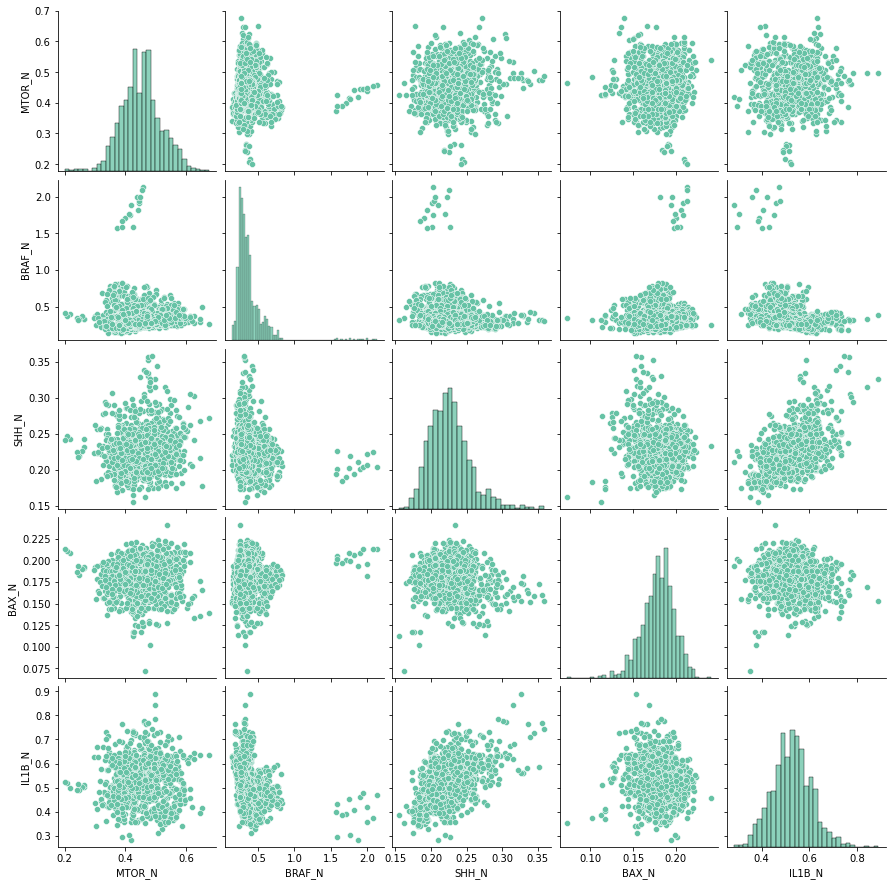

In [12]:
# pairplot
# pairplot() may become very slow with the SVG format
%config InlineBackend.figure_format = "png"
sns.set_palette("Set2")
sns.pairplot(data[["MTOR_N", "BRAF_N", "SHH_N", 
                 "BAX_N", "IL1B_N"]]);
# In the plot: # sometimes we may see clusters # histograms show "stolbcy" that illustrate how many values on an exact x
# clouds means there is no linear dependence
# the task is to find linear dependence (line)
# ~ correlation: pearson, spearman, kernel
# correlation coef varies from -1 through 0 to +1
# correlation coef equals 1 - ideal line # => knowing one value we may predict another value

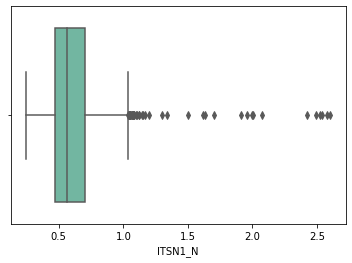

In [13]:
# can visualize individual columns
sns.boxplot(x = data["ITSN1_N"])

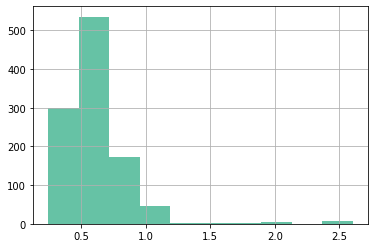

In [14]:
data["ITSN1_N"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


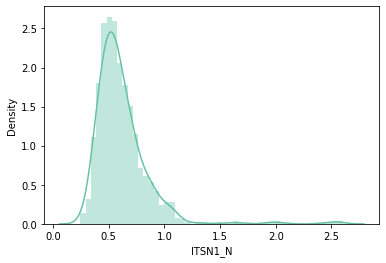

In [15]:
sns.distplot(data["ITSN1_N"])

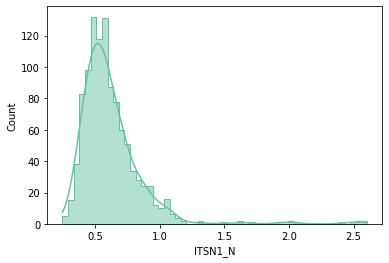

In [16]:
sns.histplot(data["ITSN1_N"], kde = True, element = "step") # new version of the previous one

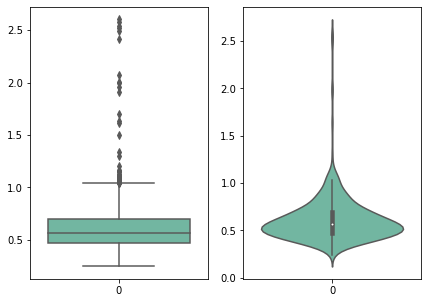

In [17]:
_, axes = plt.subplots(1, 2, figsize = (7, 5)) # 1,2 - 1 row 2 columns = same as nrows ncols
# _, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(7, 5)) similarly
sns.boxplot(data = data["ITSN1_N"], ax = axes[0]); # ax = axes[0] - here
# sns.boxplot(data=data["ITSN1_N"], ax = axes[1]); # change 0 - 1
sns.violinplot(data=data["ITSN1_N"], ax = axes[1]); 
# sns.violinplot(data=data["ITSN1_N"], ax = axes[0]); # change 1 - 0

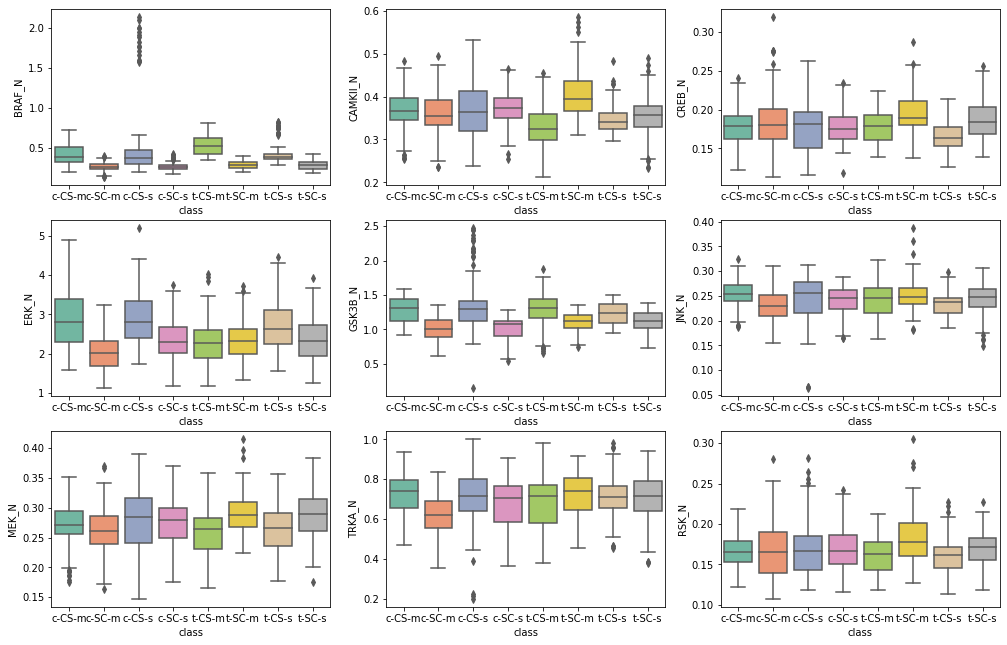

In [18]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(17,11))

for idx, feat in enumerate(data.columns[20:29]): #i-i9 - columns
    sns.boxplot(x = "class",y = feat, data = data, ax = axes[int(idx/3), idx %3])
# row-column [0,0],[0,1],[0,2],[1,0] ..

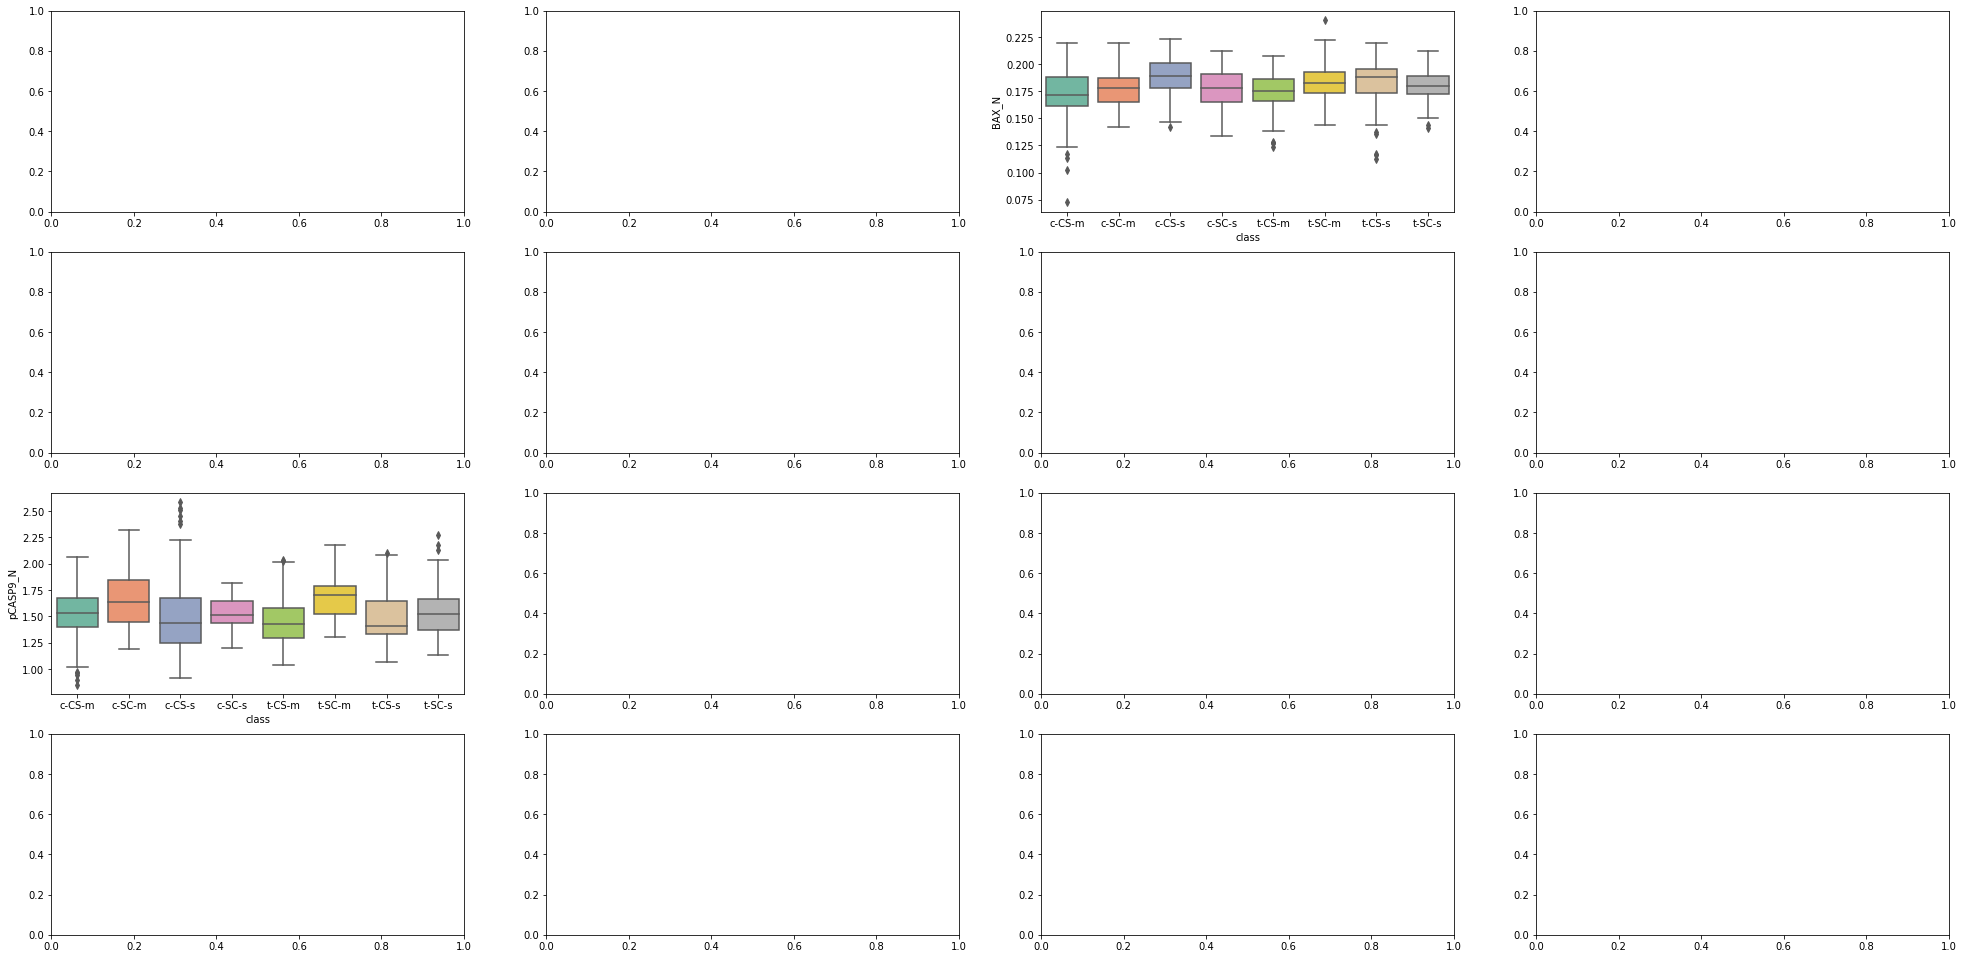

In [19]:
# we can make it manually:
# axes like set of cells

fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (34,17))

sns.boxplot(x = "class",y = data.columns[60], data = data, ax = axes[2,0])
sns.boxplot(x = "class",y = data.columns[50], data = data, ax = axes[0,2])

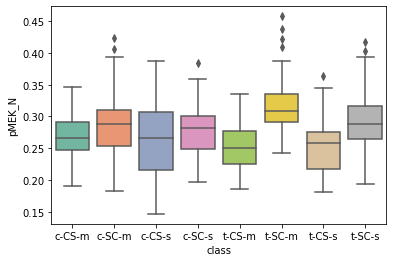

In [20]:
sns.boxplot(x = "class", y = "pMEK_N", data = data) # it is also possible to make it for one column 

In [21]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a col

### Correlation

In [22]:
# show which data we have
data

DYRK1A_N  ITSN1_N  BDNF_N  NR1_N  ...  pS6_N  SYP_N  CaNA_N   class
0         0.50     0.75    0.43   2.82  ...   0.11   0.43    1.68  c-CS-m
1         0.51     0.69    0.41   2.79  ...   0.11   0.44    1.74  c-CS-m
2         0.51     0.73    0.42   2.69  ...   0.11   0.44    1.93  c-CS-m
3         0.44     0.62    0.36   2.47  ...   0.10   0.39    1.70  c-CS-m
4         0.43     0.62    0.36   2.37  ...   0.10   0.43    1.84  c-CS-m
...        ...      ...     ...    ...  ...    ...    ...     ...     ...
1075      0.25     0.46    0.25   2.09  ...   0.12   0.37    1.36  t-SC-s
1076      0.27     0.47    0.25   2.16  ...   0.11   0.38    1.36  t-SC-s
1077      0.23     0.40    0.23   1.73  ...   0.12   0.42    1.43  t-SC-s
1078      0.22     0.41    0.24   1.88  ...   0.13   0.40    1.40  t-SC-s
1079      0.30     0.46    0.26   2.09  ...   0.12   0.42    1.37  t-SC-s

[1073 rows x 70 columns]

In [23]:
# calculate
corr_matrix = data.corr() # .corr for df data

In [24]:
corr_matrix # correlation matrix <- symmetric matrix

DYRK1A_N  ITSN1_N  BDNF_N  NR1_N  ...  SHH_N  pS6_N  SYP_N  CaNA_N
DYRK1A_N             1.00     0.96    0.36   0.29  ...  -0.20  -0.33  -0.05    0.48
ITSN1_N              0.96     1.00    0.46   0.42  ...  -0.20  -0.26   0.04    0.52
BDNF_N               0.36     0.46    1.00   0.81  ...  -0.08   0.13   0.45    0.26
NR1_N                0.29     0.42    0.81   1.00  ...  -0.14   0.26   0.47    0.21
NR2A_N               0.33     0.43    0.75   0.87  ...  -0.26   0.26   0.40    0.19
...                   ...      ...     ...    ...  ...    ...    ...    ...     ...
pGSK3B_Tyr216_N      0.32     0.38    0.18   0.20  ...   0.31   0.08   0.35    0.51
SHH_N               -0.20    -0.20   -0.08  -0.14  ...   1.00   0.33   0.06   -0.12
pS6_N               -0.33    -0.26    0.13   0.26  ...   0.33   1.00   0.42   -0.34
SYP_N               -0.05     0.04    0.45   0.47  ...   0.06   0.42   1.00    0.25
CaNA_N               0.48     0.52    0.26   0.21  ...  -0.12  -0.34   0.25    1.00

[69 rows x 69 columns]

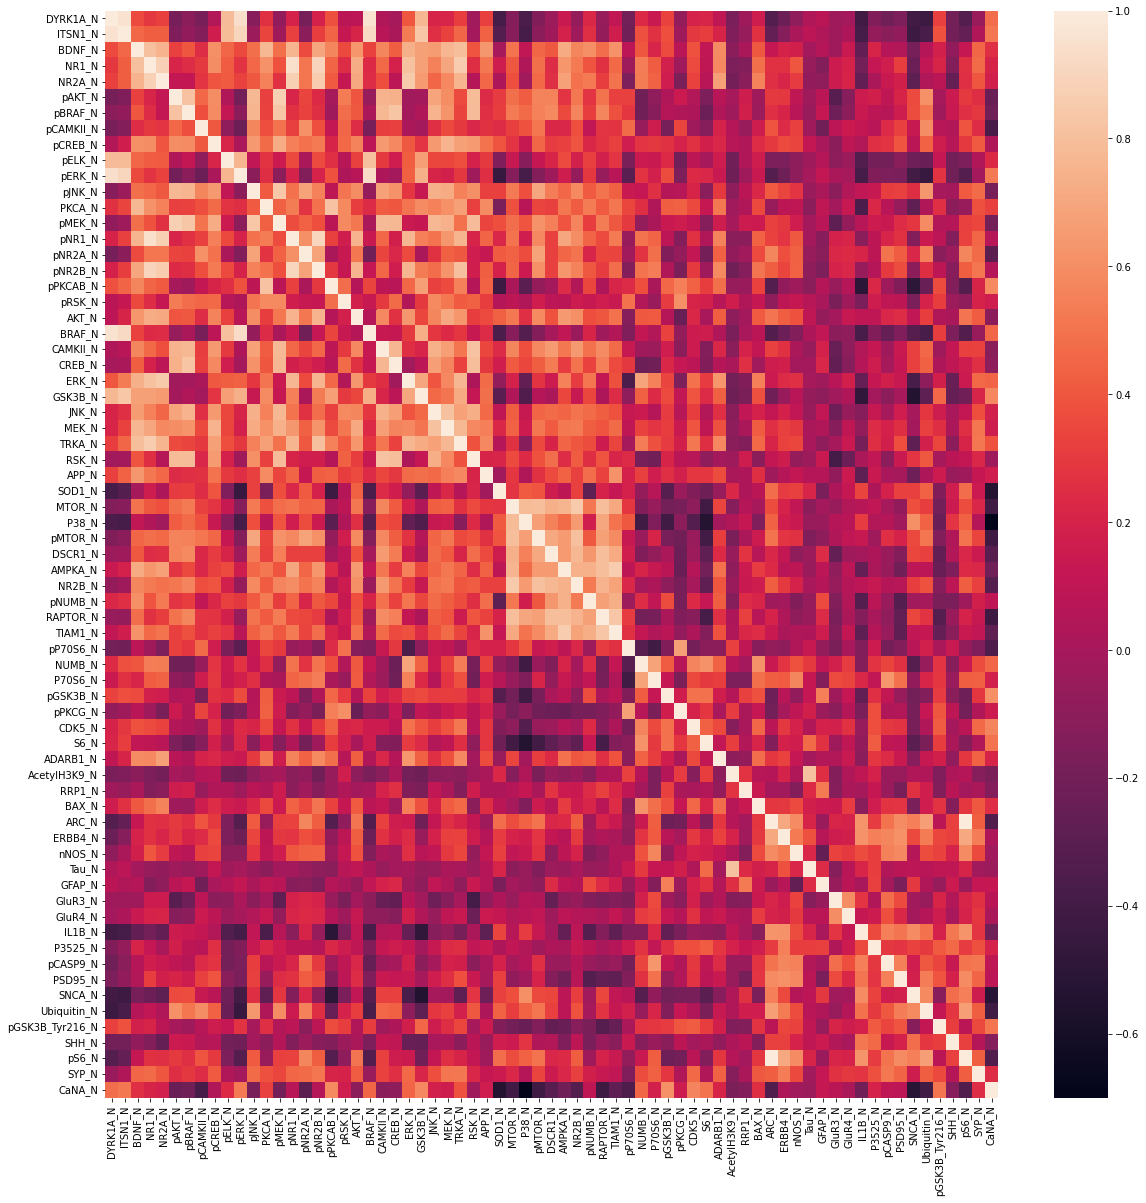

In [25]:
# and plot
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix);
# to recognize which values have strong correlation between them

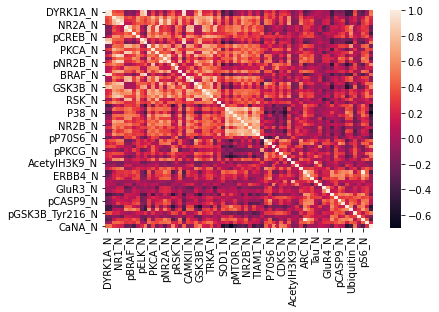

In [26]:
# Calculate and plot
corr_matrix = data.corr() # .corr for df data
#plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix);
# to recognize which val have strong correlation

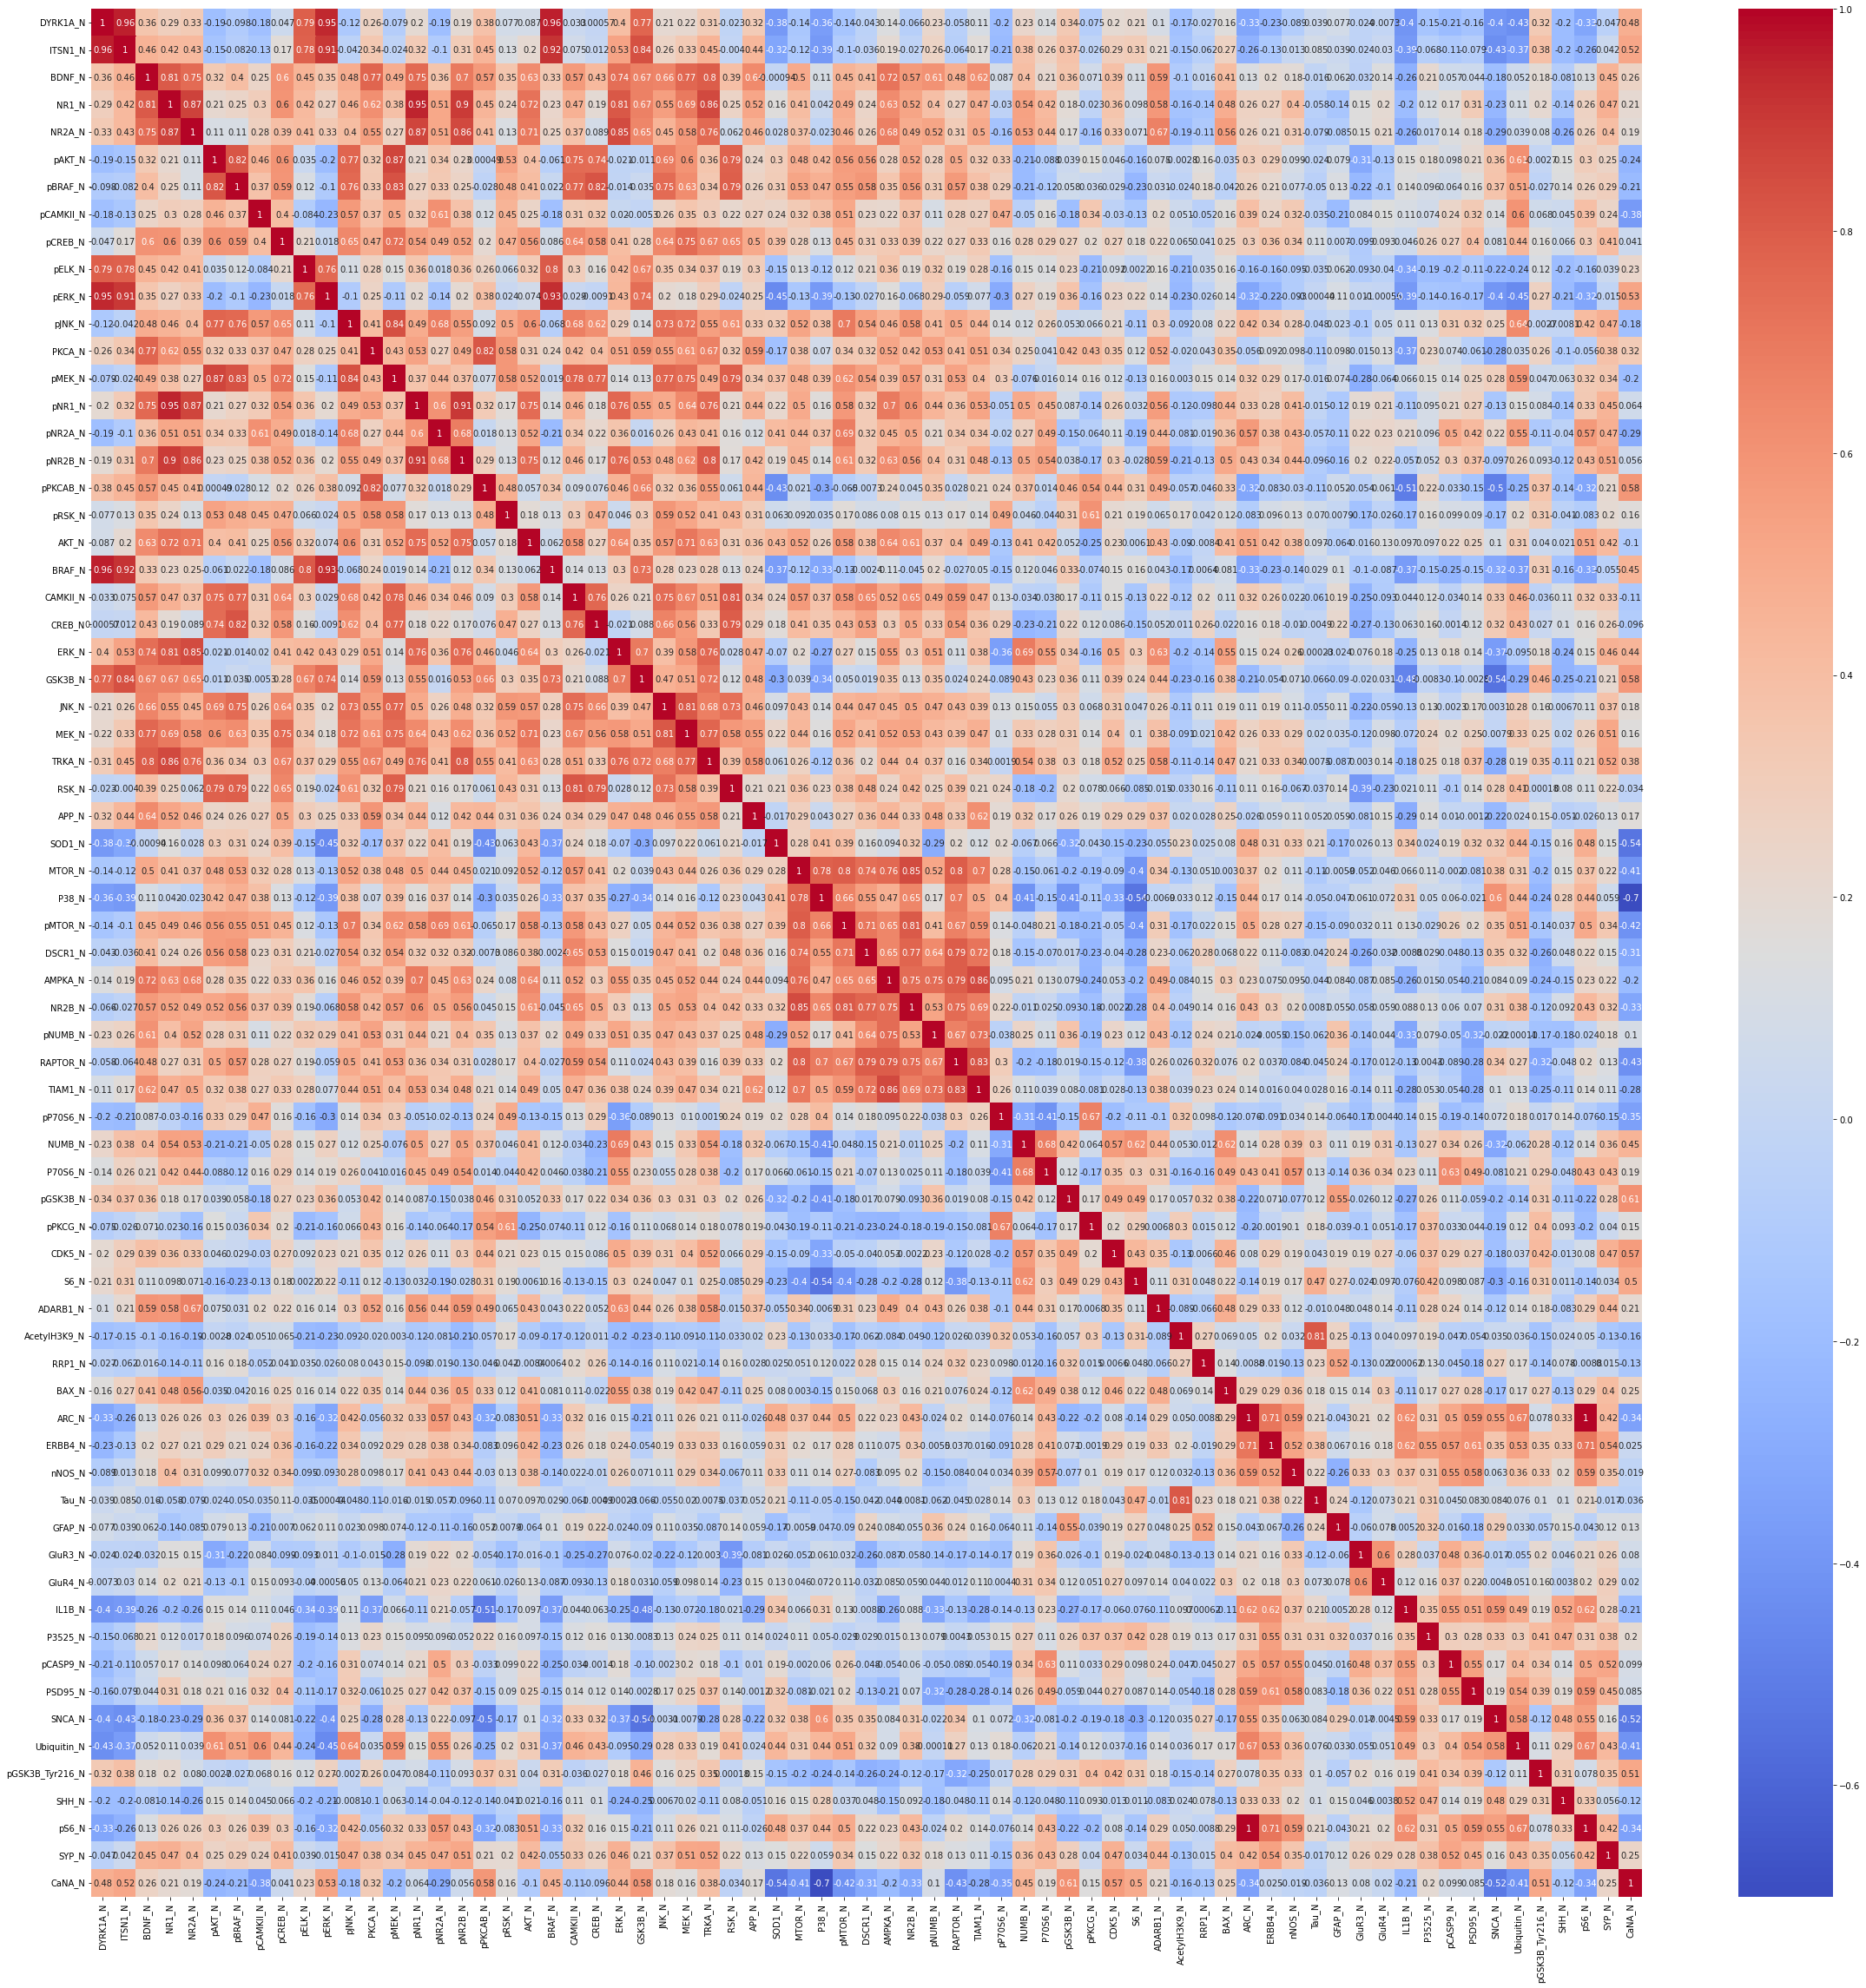

In [27]:
plt.figure(figsize = (40,40))
#sns.heatmap(data.corr(), cmap = "coolwarm"); # without annotation
sns.heatmap(corr_matrix, cmap = "coolwarm", annot = True);

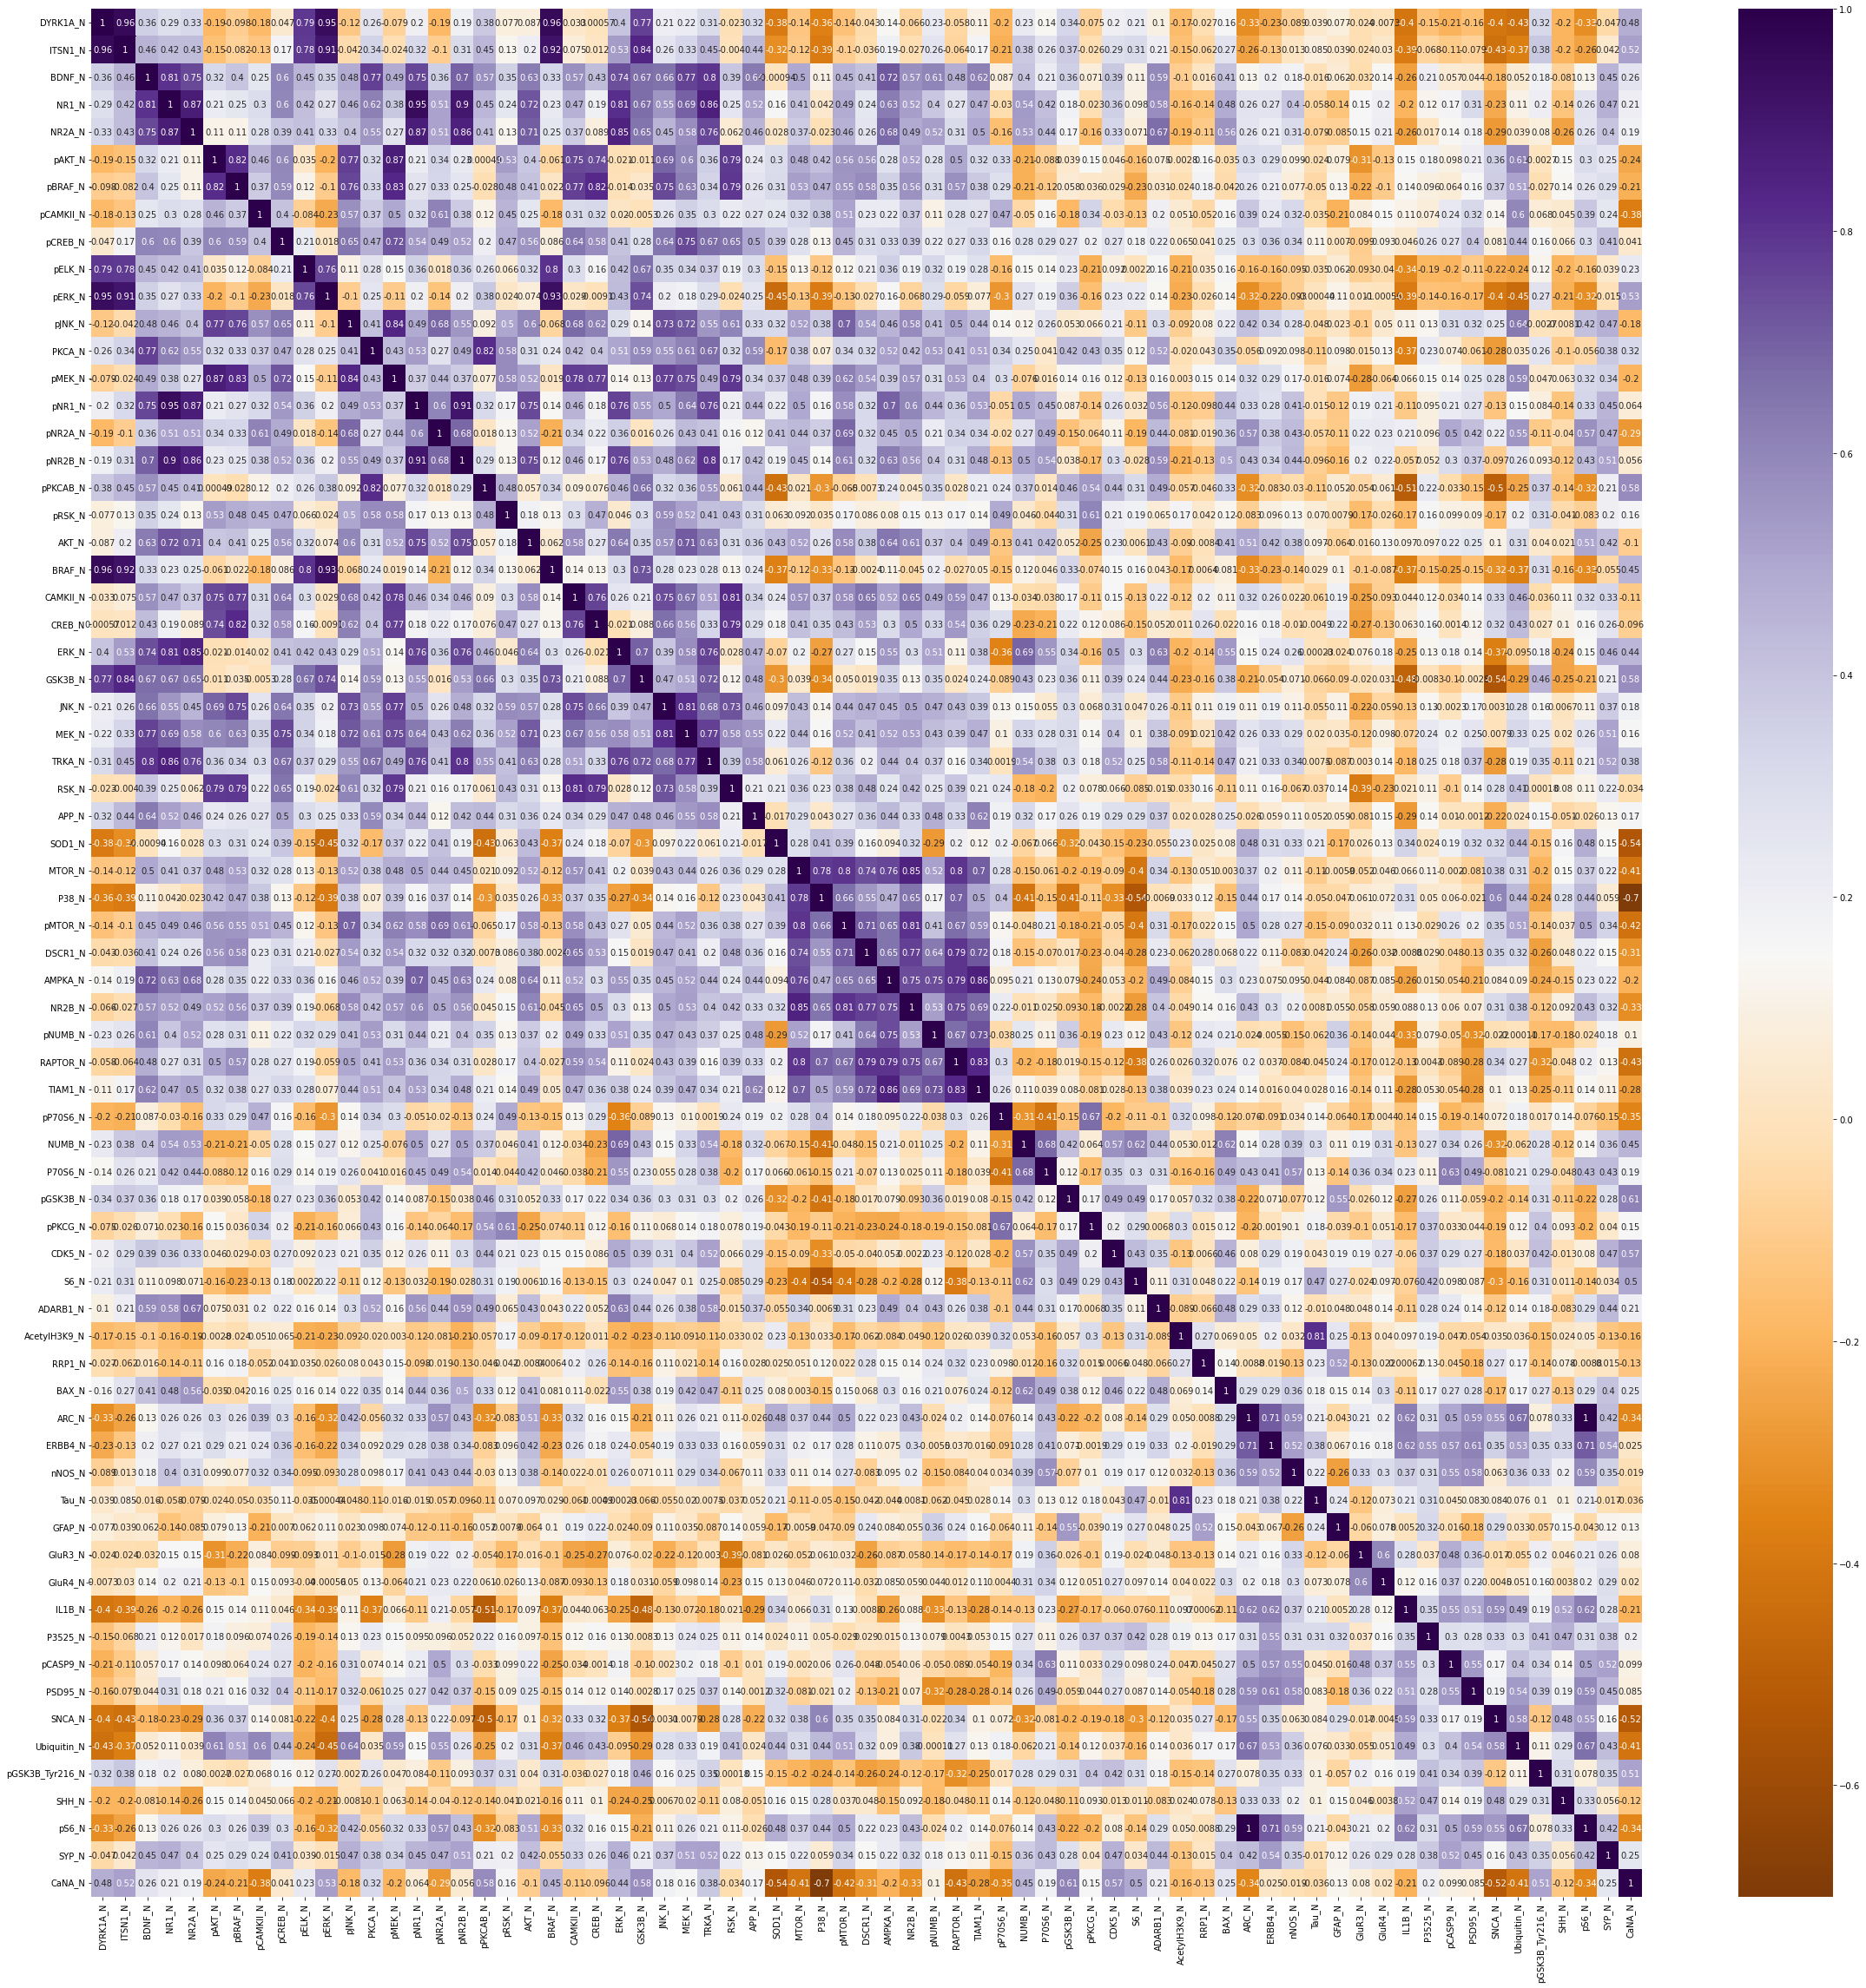

In [28]:
plt.figure(figsize = (40,40))
# sns.heatmap(data.corr(), cmap = "coolwarm");
sns.heatmap(corr_matrix, cmap = "PuOr", annot = True);

In [29]:
# it is better to remain only 1 good predictor w cor > 90. it is bad to save 2 and > w high cor

In [30]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

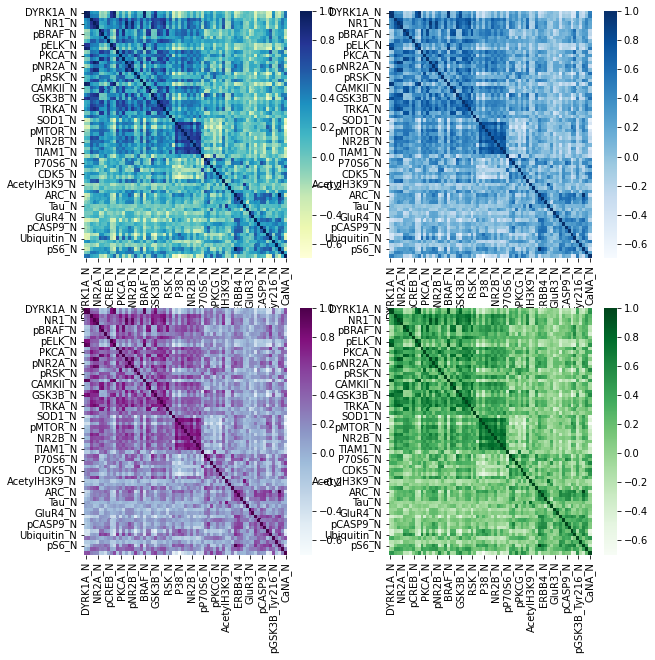

In [31]:
#cmap = "YlGnBu"
#cmap = "Blues"
#cmap = "BuPu"
#cmap = "Greens"
_, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.heatmap(corr_matrix, cmap = "YlGnBu", ax = axes[0,0]);
sns.heatmap(corr_matrix, cmap = "Blues", ax = axes[0,1]);
sns.heatmap(corr_matrix, cmap = "BuPu", ax = axes[1,0]);
sns.heatmap(corr_matrix, cmap = "Greens", ax = axes[1,1]);
# just to see another variances of corr_matrix (for the same values)

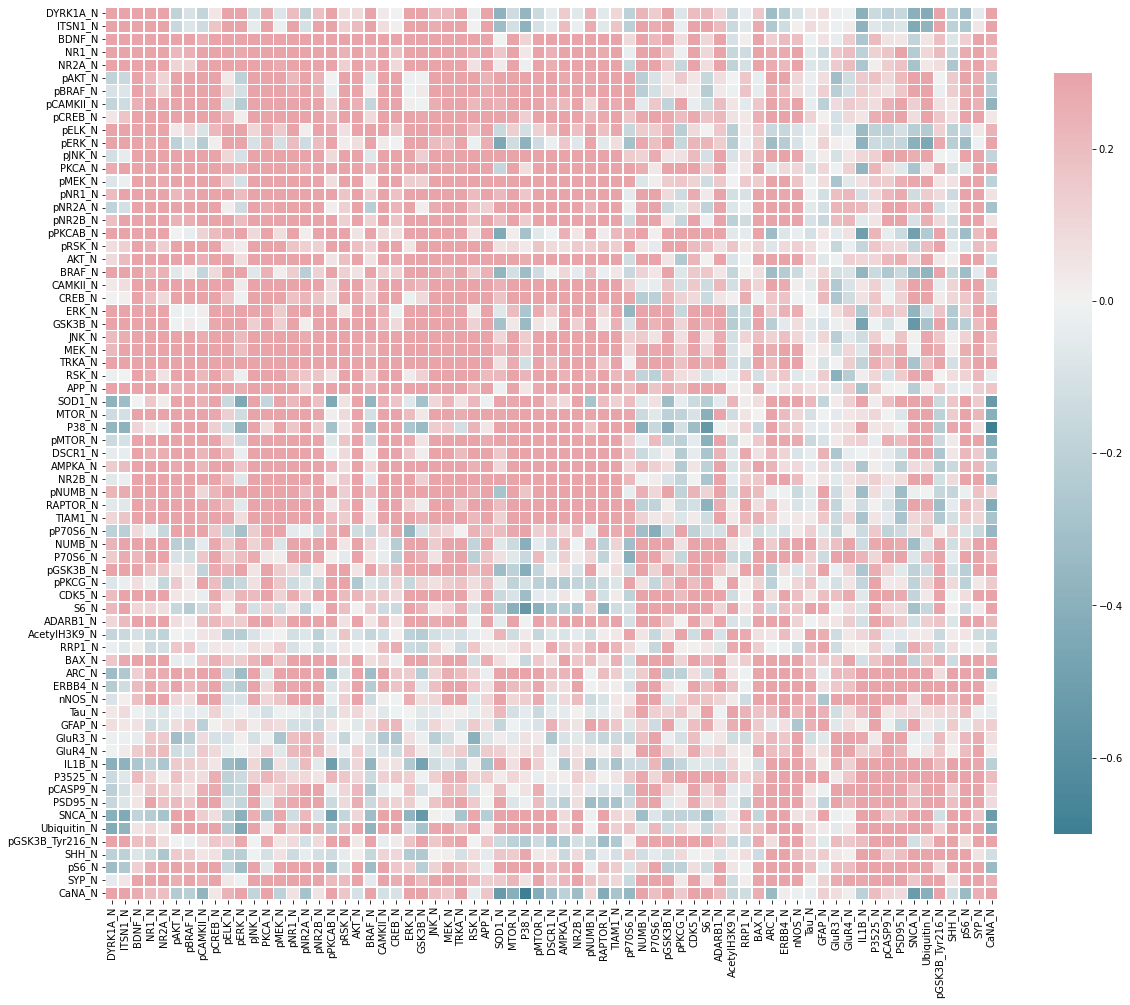

In [32]:
# matplotlib figure
f, ax = plt.subplots(figsize = (20, 20))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)
#cmap = sns.diverging_palette(0, 100, as_cmap=True) # new values ~ new palette
sns.heatmap(corr_matrix, cmap = cmap, vmax = .3, center = 0, # vmax - contrast enhancer
            square = True, linewidths = .5, cbar_kws = {"shrink": .7})

f.savefig("myfig") # to save in /content

# to change the colorbar size a solution is to use the argument cbar_kws={"shrink": .70} in the function heatmap()

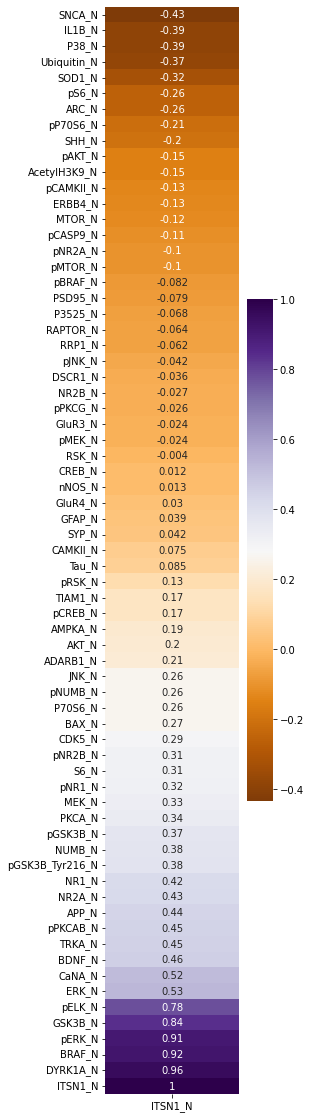

In [33]:
# draw for exact predictor (for exact value) / here it is gene ITSN1_n
plt.figure(figsize = (3,20))
#sns.heatmap(corr_matrix[["ITSN1_N"]], cmap = "coolwarm", annot = True);
sns.heatmap(corr_matrix[["ITSN1_N"]].sort_values(by = ["ITSN1_N"], ascending = True), cmap = "PuOr", annot = True);

In [34]:
from sklearn.decomposition import PCA

In [35]:
# predictors = columns = variables = features in pca
# the task is to find such values (in the formula: .. correspond to alpha) to create new variables from old ones
# 69 predictors -> 69 * 69 matrix # we will get 69 new components
# scree plot helps to identify optimal number of components

In [36]:
# then, lets divide data into train and test ones
X = data.drop(labels=["class"], axis = 1) # axis - 0,1 where 0 - row, 1 - column
Y = data["class"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) # test size 0 - 1 -  represent the proportion of the dataset to include in the test split.
# to not write random_state = .. -> generate new random value n datasets train / test each time would have dif figures.
# but if we write fixed value - for instance, random_state = 0, 1, 42, etc. -> nevertheless how much we launch a script the result would be same.

### PCA on raw non-normalized data

In [37]:
X

DYRK1A_N  ITSN1_N  BDNF_N  NR1_N  ...  SHH_N  pS6_N  SYP_N  CaNA_N
0         0.50     0.75    0.43   2.82  ...   0.19   0.11   0.43    1.68
1         0.51     0.69    0.41   2.79  ...   0.20   0.11   0.44    1.74
2         0.51     0.73    0.42   2.69  ...   0.19   0.11   0.44    1.93
3         0.44     0.62    0.36   2.47  ...   0.19   0.10   0.39    1.70
4         0.43     0.62    0.36   2.37  ...   0.21   0.10   0.43    1.84
...        ...      ...     ...    ...  ...    ...    ...    ...     ...
1075      0.25     0.46    0.25   2.09  ...   0.28   0.12   0.37    1.36
1076      0.27     0.47    0.25   2.16  ...   0.28   0.11   0.38    1.36
1077      0.23     0.40    0.23   1.73  ...   0.29   0.12   0.42    1.43
1078      0.22     0.41    0.24   1.88  ...   0.31   0.13   0.40    1.40
1079      0.30     0.46    0.26   2.09  ...   0.29   0.12   0.42    1.37

[1073 rows x 69 columns]

In [38]:
Y

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1073, dtype: object

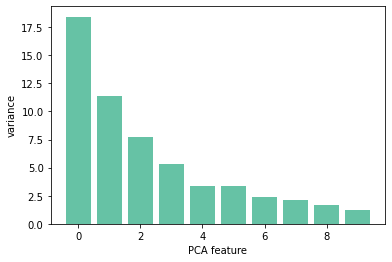

In [83]:
my_pca = PCA(n_components = 10)
#my_pca = PCA()
my_pca.fit(X) # fit it is smth like we start to fit it now - machine learning starts here for: neural network, linear regression / it doesnt make any transformation
X_pca = my_pca.transform(X) # after fit, transformation is to find good transformation


plt.bar(range(my_pca.n_components_), my_pca.explained_variance_)
plt.xlabel("PCA feature")
plt.ylabel("variance")
plt.show()

In [53]:
#my_pca # we see it is not a matrix, it is an object

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
#my_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
X_pca # array - or it is better to say arrays: "massivy" -> "massiv massivov"
# but we would like to see it as a beautiful table

array([[ 0.68165118,  2.75774583,  0.00548612, ..., -0.24731596,
         0.23652918,  0.26554272],
       [ 0.33062423,  2.47310771, -0.0493574 , ..., -0.28233416,
         0.14274596,  0.24302593],
       [ 0.29423264,  2.46919397,  0.04358851, ..., -0.21682282,
         0.14678164,  0.19826242],
       ...,
       [-2.56668219, -1.13029772,  0.63266038, ..., -0.25197984,
        -0.36486131, -0.19369237],
       [-2.30746003, -1.0120682 ,  0.61770782, ..., -0.26241667,
        -0.30806162, -0.18794211],
       [-1.82027973, -0.82211181,  0.66390299, ..., -0.13925747,
        -0.12218048, -0.15296119]])

In [56]:
pd.DataFrame(X_pca) # now it is better
# if we take n = 10 instead of all - pca() -> it takes the best variants w/out 0,0000 as in the case of pca().

0     1         2     3     4     5     6     7     8     9
0     0.68  2.76  5.49e-03 -0.60 -0.56 -0.03 -0.34 -0.25  0.24  0.27
1     0.33  2.47 -4.94e-02 -0.59 -0.40 -0.10 -0.40 -0.28  0.14  0.24
2     0.29  2.47  4.36e-02 -0.65 -0.28 -0.12 -0.45 -0.22  0.15  0.20
3    -0.34  1.82  2.55e-01 -0.47 -0.57 -0.10 -0.25 -0.31  0.21  0.17
4    -0.56  1.60  2.94e-01 -0.50 -0.38 -0.17 -0.24 -0.29  0.16  0.10
...    ...   ...       ...   ...   ...   ...   ...   ...   ...   ...
1068 -1.74 -0.88  6.25e-01 -0.52  0.21  0.77 -0.29 -0.10 -0.14 -0.28
1069 -1.58 -0.73  6.16e-01 -0.54  0.08  0.78 -0.29 -0.13 -0.11 -0.29
1070 -2.57 -1.13  6.33e-01 -0.59  0.30  0.55 -0.21 -0.25 -0.36 -0.19
1071 -2.31 -1.01  6.18e-01 -0.65  0.32  0.65 -0.19 -0.26 -0.31 -0.19
1072 -1.82 -0.82  6.64e-01 -0.54  0.23  0.80 -0.17 -0.14 -0.12 -0.15

[1073 rows x 10 columns]

In [58]:
#my_pca.components_ # "_" means it has internal counted values

array([[ 1.35549885e-02,  3.13004860e-02,  2.13876996e-02,
         1.73016541e-01,  4.74989056e-01,  1.11964453e-02,
         6.13641130e-03,  7.60822295e-01,  1.23407641e-02,
         6.11412612e-02,  1.10256801e-02,  2.22568472e-02,
         2.22940147e-02,  1.61406096e-02,  5.81553104e-02,
         9.27253727e-02,  1.40741582e-01,  1.24443413e-01,
         1.91760756e-02,  4.82409787e-02,  5.59410696e-03,
         1.56621536e-02,  5.36179411e-03,  2.33391398e-01,
         6.75377690e-02,  1.03115724e-02,  1.72783504e-02,
         5.66075406e-02,  4.21271254e-03,  2.01025952e-02,
         3.47172014e-02,  1.92162847e-02,  1.42833806e-02,
         5.12390212e-02,  2.06427132e-02,  2.24843040e-02,
         3.20818914e-02,  1.58655704e-02,  1.31256921e-02,
         2.15995356e-02,  2.74548774e-02,  6.04301772e-03,
         4.54013191e-02,  1.11854598e-04,  8.31297366e-02,
         5.57746815e-03, -4.02492636e-04,  1.34554064e-01,
        -8.23868548e-03, -2.23382586e-03,  5.71444392e-0

In [59]:
#my_pca.components_ # count: 69 components
my_pca.components_.shape

(10, 69)

In [69]:
# PCA Components
pd.DataFrame(my_pca.components_).T.head() # .T - transposed matrix
#pd.DataFrame(my_pca.components_)

0     1         2         3  ...         6     7     8     9
0  0.01  0.12  1.32e-01  2.79e-01  ... -6.12e-02 -0.03 -0.17  0.05
1  0.03  0.13  1.36e-01  2.30e-01  ... -5.48e-02  0.03 -0.17  0.03
2  0.02  0.02  9.99e-03 -3.52e-03  ...  2.70e-02  0.02  0.03 -0.02
3  0.17  0.16 -2.13e-02 -6.68e-02  ... -1.54e-03 -0.09  0.29 -0.12
4  0.47  0.48 -1.91e-01 -1.49e-01  ... -2.78e-01 -0.42 -0.20  0.16

[5 rows x 10 columns]

In [70]:
my_pca.explained_variance_ # 69 components. the first 10 components create the greatest contribution starting from 1 to .. (descending)

array([2.082645  , 1.51036738, 0.50916255, 0.317824  , 0.14105288,
       0.1168465 , 0.07220209, 0.0570252 , 0.0506039 , 0.03513628])

In [71]:
my_pca.explained_variance_ratio_

array([0.40922614, 0.29677733, 0.10004712, 0.06245034, 0.02771597,
       0.02295957, 0.01418724, 0.01120508, 0.00994334, 0.00690405])

In [72]:
my_pca.explained_variance_ratio_[0] # 40 % - explanation of the variance of the data by the first comp.

0.4092261418454327

In [73]:
for i in range(10):
    print( str(i) + " parameters managed to capture: " + 
    str(sum(my_pca.explained_variance_ratio_[:i]))[:5] + " of explained variance") # 1 parameter captures 41%....  10 comp. capture almost 100 %

0 parameters managed to capture: 0 of explained variance
1 parameters managed to capture: 0.409 of explained variance
2 parameters managed to capture: 0.706 of explained variance
3 parameters managed to capture: 0.806 of explained variance
4 parameters managed to capture: 0.868 of explained variance
5 parameters managed to capture: 0.896 of explained variance
6 parameters managed to capture: 0.919 of explained variance
7 parameters managed to capture: 0.933 of explained variance
8 parameters managed to capture: 0.944 of explained variance
9 parameters managed to capture: 0.954 of explained variance


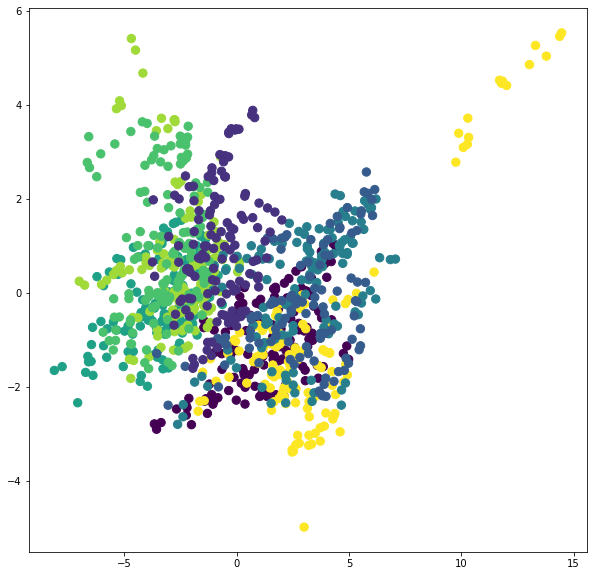

In [85]:
# convert Y_train data set into the numeric values
d = dict(zip(set(Y), range(1,9)))
label = list()
for i in Y:
    label.append(d[i])

# and create the plot based on the 2 components / 2-7
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,1], X_pca[:,6], c=label, s=70, cmap="viridis") # 2 n 7 comp [:,1] [:,6]
plt.show()

# dif colors - dif classes: all the 8 classes on the 2 components [2-7]
# PCA finds new transfomations to analyze it by lower number of components

# The number of principal components is less than or equal to the number of original variables.
# Principal components analysis is a procedure for identifying a smaller number of uncorrelated variables, called "principal components", from a large set of data.. 
# The goal of principal components analysis is to explain the maximum amount of variance with the fewest number of principal components.

### PCA on normalized data

In [77]:
# data preprocessing includes centering and normalization

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create an obj that is made by calling f "StandardScaler"
X_array = scaler.fit_transform(X) # f fit_transform(X) -> transformation of x -> normalization
X = pd.DataFrame(X_array, index=X.index, columns=X.columns)

In [79]:
X # the same genes but the values are scaled

DYRK1A_N   ITSN1_N  BDNF_N  NR1_N  ...  SHH_N  pS6_N  SYP_N  CaNA_N
0         0.31  5.16e-01    2.25   1.49  ...  -1.31  -1.06  -0.29    1.07
1         0.36  2.85e-01    1.87   1.42  ...  -0.91  -1.04  -0.07    1.28
2         0.33  4.49e-01    2.01   1.12  ...  -1.14  -0.93  -0.16    1.85
3         0.07 -6.36e-04    0.80   0.49  ...  -1.19  -1.28  -0.82    1.14
4         0.04  7.68e-04    0.80   0.20  ...  -0.73  -1.17  -0.18    1.58
...        ...       ...     ...    ...  ...    ...    ...    ...     ...
1075     -0.68 -6.10e-01   -1.30  -0.59  ...   1.68  -0.40  -1.08    0.09
1076     -0.62 -5.68e-01   -1.36  -0.39  ...   1.95  -0.55  -1.06    0.09
1077     -0.79 -8.81e-01   -1.72  -1.62  ...   2.21  -0.18  -0.36    0.30
1078     -0.82 -8.11e-01   -1.52  -1.21  ...   2.76   0.26  -0.73    0.21
1079     -0.49 -6.20e-01   -1.26  -0.59  ...   2.26  -0.18  -0.39    0.11

[1073 rows x 69 columns]

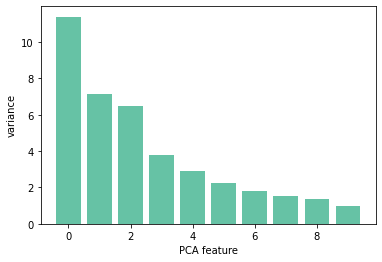

In [98]:
my_pca = PCA(n_components = 10)  
my_pca.fit(X)  
X_pca = my_pca.transform(X)  

plt.bar(range(my_pca.n_components_), my_pca.explained_variance_)
plt.xlabel("PCA feature")
plt.ylabel("variance")
plt.show() 

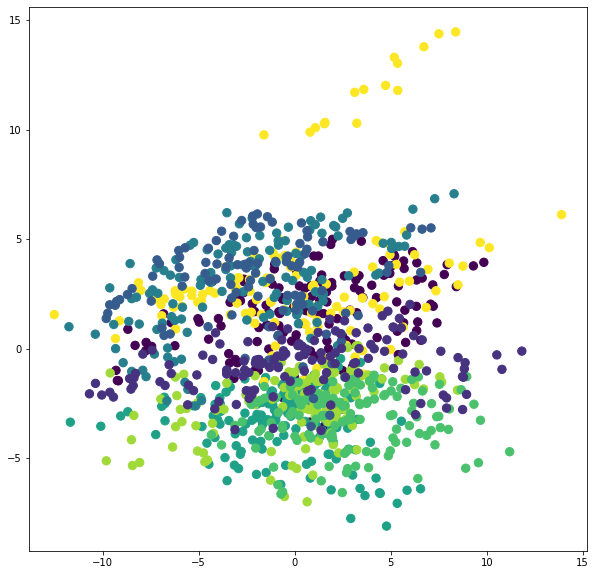

In [92]:
# convert Y_train data set into the numeric values
d = dict(zip(set(Y), range(1,9)))
label = list()
for i in Y:
    label.append(d[i])

# and create the plot based on the first 2 components [1-2]
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=label, s=70, cmap="viridis")
plt.show()

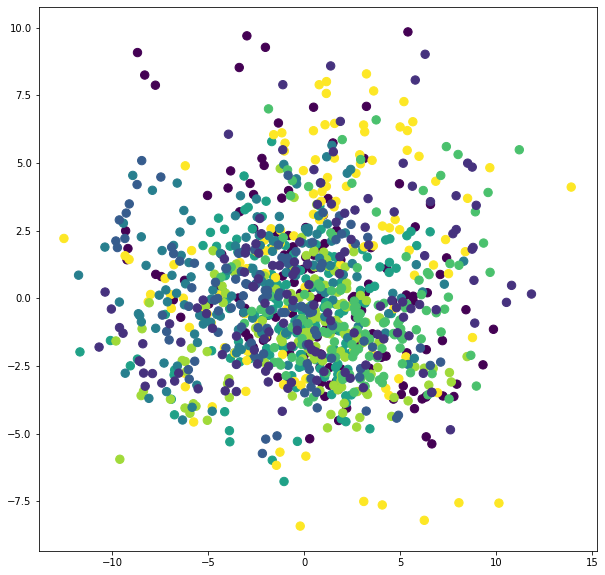

In [90]:
# and create the plot based on the 2 components [1-3]
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0], X_pca[:,2], c=label, s=70, cmap="viridis")
plt.show()

In [96]:
# Filter highly correlated components.

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr() # 1. create cor. matrix
    for i in range(len(corr_matrix.columns)): # 2. go through elems of matrix - rows and columns
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold: # 3. if el >= "porog" then extract it and add into a new matrix column
                colname = corr_matrix.columns[i] # getting the name of a column
                col_corr.add(colname)
                if colname in dataset.columns: # if col in new cors with old we delete it
                    del dataset[colname] # deleting the column from the dataset

    return dataset # w lower n of predictors -->
    
X_filtered = correlation(X, 0.8) # <-- "porog" 0.8 / threshold # new dataset contains 20 % lower than original one
col_filtered = X_filtered.columns
col_filtered
X_filtered.shape

(1073, 49)

In [97]:
X_filtered

DYRK1A_N  BDNF_N  pAKT_N  ...  SHH_N  SYP_N  CaNA_N
0         0.31    2.25   -0.36  ...  -1.31  -0.29    1.07
1         0.36    1.87   -0.54  ...  -0.91  -0.07    1.28
2         0.33    2.01   -0.60  ...  -1.14  -0.16    1.85
3         0.07    0.80   -0.26  ...  -1.19  -0.82    1.14
4         0.04    0.80   -0.50  ...  -0.73  -0.18    1.58
...        ...     ...     ...  ...    ...    ...     ...
1075     -0.68   -1.30   -0.54  ...   1.68  -1.08    0.09
1076     -0.62   -1.36    0.43  ...   1.95  -1.06    0.09
1077     -0.79   -1.72   -0.32  ...   2.21  -0.36    0.30
1078     -0.82   -1.52   -0.61  ...   2.76  -0.73    0.21
1079     -0.49   -1.26    0.43  ...   2.26  -0.39    0.11

[1073 rows x 49 columns]

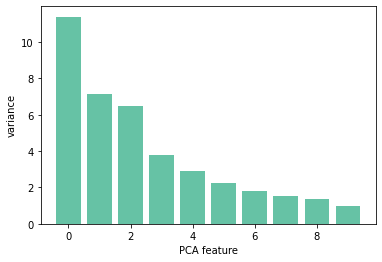

In [99]:
my_pca = PCA(n_components = 10)  
my_pca.fit(X_filtered)  
X_filtered_pca = my_pca.transform(X_filtered)  

plt.bar(range(my_pca.n_components_), my_pca.explained_variance_)
plt.xlabel("PCA feature")
plt.ylabel("variance")
plt.show()

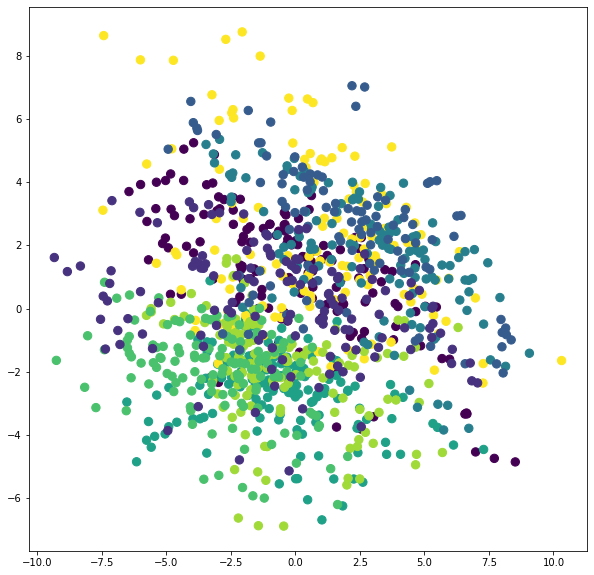

In [100]:
# and create the plot based on the first 2 components [1-2]
plt.figure(figsize=(10,10))
plt.scatter(X_filtered_pca[:,0], X_filtered_pca[:,1], c=label, s=70, cmap="viridis")
plt.show()

Text(0.5, 1.0, 'PC3 vs PC4')

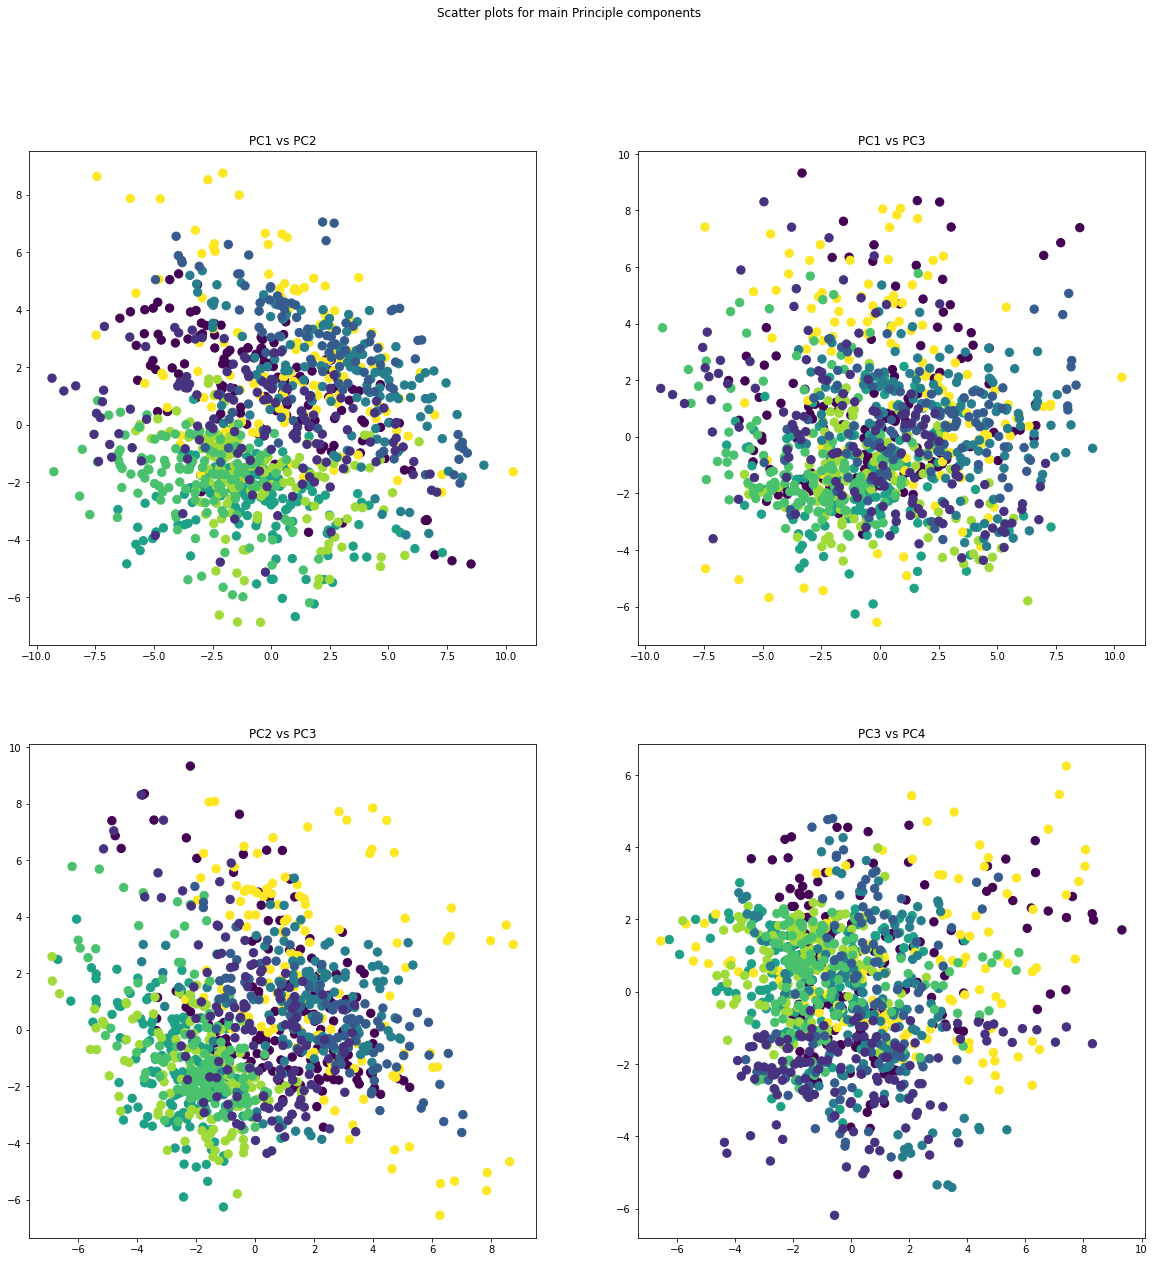

In [106]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.suptitle("Scatter plots for main Principle components")
ax[0,0].scatter(X_pca[:, 0], X_pca[:, 1], c=label, s=70, cmap="viridis")
ax[0,0].set_title("PC1 vs PC2")
ax[0,1].scatter(X_pca[:, 0], X_pca[:, 2], c=label, s=70, cmap="viridis")
ax[0,1].set_title("PC1 vs PC3")
ax[1,0].scatter(X_pca[:, 1], X_pca[:, 2], c=label, s=70, cmap="viridis")
ax[1,0].set_title("PC2 vs PC3")
ax[1,1].scatter(X_pca[:, 2], X_pca[:, 3], c=label, s=70, cmap="viridis")
ax[1,1].set_title("PC3 vs PC4")

#ax[1,1].scatter(X_filtered_pca[:, 0], X_filtered_pca[:, 1], c=label, s=70, cmap="viridis")

Text(0.5, 1.0, 'AMPKA_N vs AKT_N')

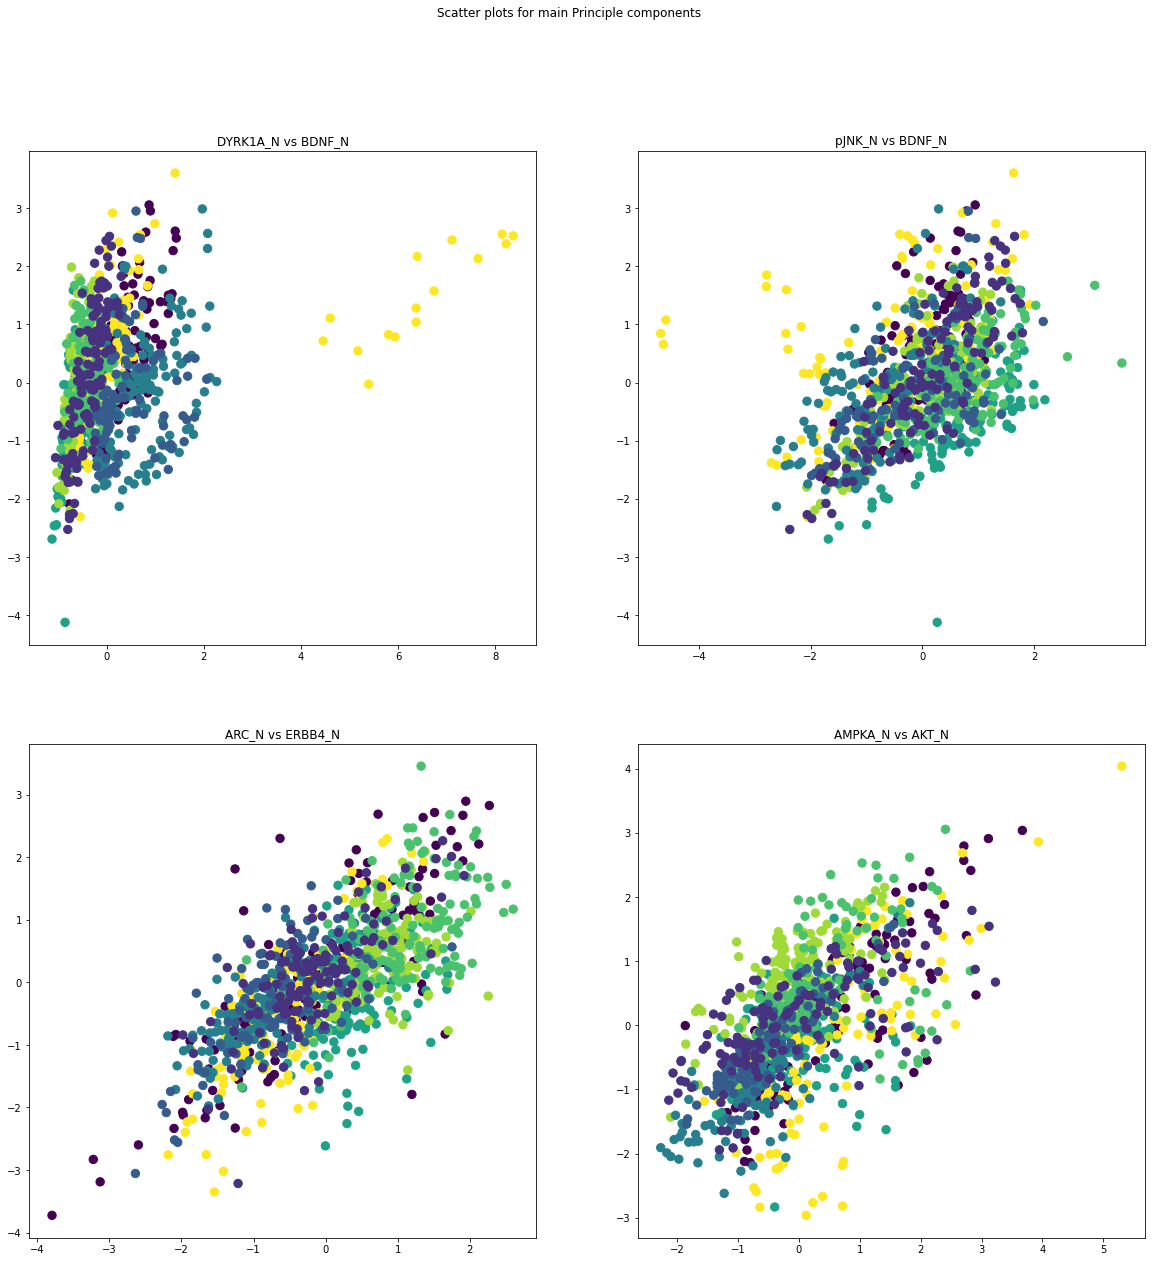

In [108]:
fig, ax=plt.subplots(nrows=2, ncols=2,figsize=(20,20))
fig.suptitle("Scatter plots for main Principle components")
ax[0,0].scatter(X.iloc[:,0], X.iloc[:, 1], c=label, s=70, cmap="viridis")
ax[0,0].set_title(f"{X.columns[0]} vs {X.columns[1]}")
ax[0,1].scatter(X.iloc[:,6], X.iloc[:, 1], c=label, s=70, cmap="viridis")
ax[0,1].set_title(f"{X.columns[6]} vs {X.columns[1]}")
ax[1,0].scatter(X.iloc[:,33], X.iloc[:, 34], c=label, s=70, cmap="viridis")
ax[1,0].set_title(f"{X.columns[33]} vs {X.columns[34]}")
ax[1,1].scatter(X.iloc[:,19], X.iloc[:, 10], c=label, s=70, cmap="viridis")
ax[1,1].set_title(f"{X.columns[19]} vs {X.columns[10]}")

In [110]:
# X.iloc[:,0] # DYRK1A_N values

In [ ]:
# Application of Principal component analysis (PCA) (the case studies):
# 1. GWAS: Principal component analysis (PCA) is a potential approach that can be applied in multiple-trait genome-wide association studies (GWAS) to explore pleiotropy, as well as increase the power of quantitative trait loci (QTL) detection. 
# 2. Single cell seq (clustering of a cell type by an expression). For instance, PCA is an essential method for analyzing single-cell RNA-seq (scRNA-seq) datasets (*but for large-scale scRNA-seq datasets, computation time is long and consumes large amounts of memory).

In [ ]:
# PCA is commonly used as one step in a series of analyses. It can be used to reduce the number of variables and avoid multicollinearity, or when you have too many predictors relative to the number of observations.
# 1.1 In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.
# 1.1.1 Multicollinearity is when independent variables in a regression model are correlated.
# 1.1.1.* Multicollinearity is a state of very high correlation among the independent variables, i.e. a predictor variable can be used to predict another predictor variable.